# Librerías

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Dataset

In [2]:
df = pd.read_excel("data/Dataset.xlsx")

Eliminar valores nulos:

In [3]:
df = df.dropna()

Separar datos objetivo: RON y MON

In [4]:
X = df.drop(columns=["RON", "MON"])
y = df[["RON", "MON"]]

# Split train test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalización

In [6]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_s = scaler_X.fit_transform(X_train)
X_test_s  = scaler_X.transform(X_test)
y_train_s = scaler_y.fit_transform(y_train)
y_test_s  = scaler_y.transform(y_test)

# Modelo MLP

In [7]:
mlp = MLPRegressor(random_state=42)

Búsqueda de hiperparámetros

In [8]:
param_dist = {
    "hidden_layer_sizes": [(100,), (100,50,), (150,100,50,), (200,100,50,25,)],
    "activation": ["relu", "tanh"],
    "solver": ["adam", "lbfgs"],
    "alpha": [1e-4, 1e-3, 1e-2, 1e-1],
    "learning_rate": ["constant", "adaptive"],
    "learning_rate_init": [1e-4, 1e-3, 1e-2],
    "max_iter": [500, 1000]
}

Randomized search con validación cruzada:

In [9]:
search = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=param_dist,
    n_iter=50,               # prueba 50 combinaciones
    cv=5,
    scoring="r2",             # o puedes usar negativo MSE
    n_jobs=-1,
    verbose=2,
    random_state=42
)

In [10]:
search.fit(X_train_s, y_train_s)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, solver=adam; total time=   2.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, solver=adam; total time=   2.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, solver=adam; total time=   2.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, solver=adam; total time=   2.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, solver=adam; total time=   3.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(150, 100, 50), learning_rate=constant, learning_rate_init=0.

/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.0001, max_iter=500, solver=lbfgs; total time=  20.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=adam; total time=   8.9s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=adam; total time=   8.1s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.0001, max_iter=500, solver=lbfgs; total time=  21.1s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=adam; total time=   9.0s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.0001, max_iter=500, solver=lbfgs; total time=  21.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(150, 100, 50), learning_rate=constant, learning_rate_init=0.0001, max_iter=500, solver=adam; total time=  12.8s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(150, 100, 50), learning_rate=constant, learning_rate_init=0.001, max_iter=500, solver=adam; total time=   3.6s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.0001, max_iter=500, solver=lbfgs; total time=  24.1s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(150, 100, 50), learning_rate=constant, learning_rate_init=0.001, max_iter=500, solver=adam; total time=   3.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(150, 100, 50), learning_rate=constant, learning_rate_init=0.001, max_iter=500, solver=adam; total time=   4.8s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.0001, max_iter=500, solver=lbfgs; total time=  23.0s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=adam; total time=   7.5s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(150, 100, 50), learning_rate=constant, learning_rate_init=0.001, max_iter=500, solver=adam; total time=   3.4s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(150, 100, 50), learning_rate=constant, learning_rate_init=0.001, max_iter=500, solver=adam; total time=   4.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, solver=adam; total time=   1.4s
[C

/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=lbfgs; total time= 1.2min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=lbfgs; total time= 1.2min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=lbfgs; total time= 1.2min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=lbfgs; total time= 1.2min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=lbfgs; total time= 1.2min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=lbfgs; total time=  46.0s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=lbfgs; total time=  45.9s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=lbfgs; total time=  46.5s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=lbfgs; total time=  46.7s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=lbfgs; total time=  47.0s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=constant, learning_rate_init=0.0001, max_iter=500, solver=lbfgs; total time= 1.1min
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(150, 100, 50), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, solver=adam; total time=  42.2s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=constant, learning_rate_init=0.0001, max_iter=500, solver=lbfgs; total time= 1.1min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=constant, learning_rate_init=0.0001, max_iter=500, solver=lbfgs; total time= 1.1min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=constant, learning_rate_init=0.0001, max_iter=500, solver=lbfgs; total time= 1.1min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=constant, learning_rate_init=0.0001, max_iter=500, solver=lbfgs; total time= 1.1min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=adam; total time= 1.2min
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=adam; total time= 1.1min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=adam; total time= 1.1min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=adam; total time= 1.2min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=adam; total time= 1.2min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(150, 100, 50), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, solver=adam; total time=  51.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(150, 100, 50), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, solver=adam; total time=  41.4s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, solver=lbfgs; total time=  24.7s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, solver=lbfgs; total time=  24.1s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, solver=lbfgs; total time=  24.6s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.001, max_iter=500, solver=adam; total time=   4.5s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, solver=lbfgs; total time=  24.9s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, solver=lbfgs; total time=  26.1s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, solver=lbfgs; total time= 2.4min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, solver=lbfgs; total time= 2.4min
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.001, max_iter=500, solver=adam; total time=   4.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.001, max_iter=500, solver=adam; total time=   4.6s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.001, max_iter=500, solver=adam; total time=   3.3s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, solver=lbfgs; total time= 2.5min
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.001, max_iter=500, solver=adam; total time=   4.0s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, solver=lbfgs; total time= 2.5min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, solver=lbfgs; total time= 2.5min
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(150, 100, 50), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, solver=adam; total time=   4.7s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(150, 100, 50), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, solver=adam; total time=   4.7s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(150, 100, 50), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, solver=adam; total time=   4.1s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(150, 100, 50), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, solver=adam; total time=   6.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(150, 100, 50), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, solver=ada

/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(150, 100, 50), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, solver=adam; total time=  47.5s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(150, 100, 50), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=adam; total time=   4.9s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(150, 100, 50), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=adam; total time=   4.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(150, 100, 50), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, solver=adam; total time=   6.0s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(150, 100, 50), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=adam; total time=   6.1s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(150, 100, 50), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=adam; to

/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, solver=lbfgs; total time=  22.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=1000, solver=adam; total time=   7.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=adam; total time=   1.7s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, solver=lbfgs; total time=  21.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, solver=lbfgs; total time=  22.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=adam; total time=   2.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=1000, solver=adam; total time=   8.6s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, solver=lbfgs; total time=  23.2s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=lbfgs; total time=  23.0s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=lbfgs; total time=  23.3s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=constant, learning_rate_init=0.0001, max_iter=500, solver=lbfgs; total time= 1.2min
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=lbfgs; total time=  24.3s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=constant, learning_rate_init=0.0001, max_iter=500, solver=lbfgs; total time= 1.2min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=constant, learning_rate_init=0.0001, max_iter=500, solver=lbfgs; total time= 1.2min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=lbfgs; total time=  25.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=lbfgs; total time=  24.2s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, solver=lbfgs; total time=  26.4s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=constant, learning_rate_init=0.0001, max_iter=500, solver=lbfgs; total time= 1.2min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=constant, learning_rate_init=0.0001, max_iter=500, solver=lbfgs; total time= 1.2min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, solver=lbfgs; total time=  25.1s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, solver=lbfgs; total time=  25.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=adam; total time=   8.0s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, solver=lbfgs; total time=  26.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, solver=lbfgs; total time=  26.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=adam; total time=  14.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=adam; total time=   7.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=adam; total time=   7.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=adam; total time=   7.4s
[CV] END activation=relu

/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=lbfgs; total time= 1.0min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=lbfgs; total time= 1.0min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=lbfgs; total time= 1.1min
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.0001, max_iter=500, solver=adam; total time=   3.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=lbfgs; total time= 1.1min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=lbfgs; total time= 1.1min
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.0001, max_iter=500, solver=adam; total time=   3.0s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.0001, max_iter=500, solver=adam; total time=   2.9s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.0001, max_iter=500, solver=adam; total time=   2.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=constant, learning_rate_init=0.0001, max_iter=1000, solver=lbfgs; total time=  11.5s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=lbfgs; total time=  30.7s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=lbfgs; total time=  31.1s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1000, solver=lbfgs; total time= 1.0min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1000, solver=lbfgs; total time= 1.0min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1000, solver=lbfgs; total time=  58.4s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1000, solver=lbfgs; total time= 1.0min
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, solver=adam; total time=   3.5s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1000, solver=lbfgs; total time= 1.0min
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, solver=adam; total time=   3.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, solver=adam; total time=   3.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, solver=adam; total time=   3.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=500, solver=adam; total time=   3.9s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=lbfgs; total time=  29.2s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(150, 100, 50), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=1000, solver=lbfgs; total time= 1.8min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(150, 100, 50), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=1000, solver=lbfgs; total time= 1.8min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(150, 100, 50), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=1000, solver=lbfgs; total time= 1.9min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=lbfgs; total time=  30.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(150, 100, 50), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=1000, solver=lbfgs; total time= 1.8min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(150, 100, 50), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=1000, solver=lbfgs; total time= 1.9min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, solver=lbfgs; total time=  31.9s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(150, 100, 50), learning_rate=constant, learning_rate_init=0.0001, max_iter=1000, solver=adam; total time=   6.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(150, 100, 50), learning_rate=constant, learning_rate_init=0.0001, max_iter=1000, solver=adam; total time=   8.9s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(150, 100, 50), learning_rate=constant, learning_rate_init=0.0001, max_iter=1000, solver=adam; total time=  10.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(150, 100, 50), learning_rate=constant, learning_rate_init=0.0001, max_iter=1000, solver=adam; total time=   9.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(150, 100, 50), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, solver=adam; 

/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=constant, learning_rate_init=0.0001, max_iter=1000, solver=lbfgs; total time= 2.1min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.0001, max_iter=1000, solver=lbfgs; total time=  54.6s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.0001, max_iter=1000, solver=lbfgs; total time=  49.9s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.0001, max_iter=1000, solver=lbfgs; total time=  52.0s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.0001, max_iter=1000, solver=lbfgs; total time=  51.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=constant, learning_rate_init=0.0001, max_iter=500, solver=adam; total time=   9.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=constant, learning_rate_init=0.0001, max_iter=500, solver=adam; total time=   8.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=adam; total time=   2.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=adam; total

/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=adam; total time=   3.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=adam; total time=   2.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=adam; total time=   3.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=constant, learning_rate_init=0.0001, max_iter=500, solver=adam; total time=  10.1s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=constant, learning_rate_init=0.0001, max_iter=1000, solver=lbfgs; total time= 2.3min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=constant, learning_rate_init=0.0001, max_iter=500, solver=adam; total time=   8.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=constant, learning_rate_init=0.0001, max_iter=500, solver=adam; total time=   9.9s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=constant, learning_rate_init=0.0001, max_iter=1000, solver=lbfgs; total time= 2.3min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(150, 100, 50), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, solver=lbfgs; total time= 1.6min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(150, 100, 50), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, solver=lbfgs; total time= 1.7min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(150, 100, 50), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, solver=lbfgs; total time= 1.6min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(150, 100, 50), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, solver=lbfgs; total time= 1.7min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(150, 100, 50), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, solver=lbfgs; total time= 1.6min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.01, max_iter=500, solver=lbfgs; total time=  27.3s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.01, max_iter=500, solver=lbfgs; total time=  28.1s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.01, max_iter=500, solver=lbfgs; total time=  28.0s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.01, max_iter=500, solver=lbfgs; total time=  29.0s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.01, max_iter=500, solver=lbfgs; total time=  28.3s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=lbfgs; total time=  52.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=lbfgs; total time=  49.3s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=lbfgs; total time=  52.1s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=lbfgs; total time=  52.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=lbfgs; total time=  55.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=1000, solver=lbfgs; total time=  48.5s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=1000, solver=lbfgs; total time=  50.2s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=1000, solver=lbfgs; total time=  52.3s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=1000, solver=lbfgs; total time=  54.2s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=1000, solver=lbfgs; total time=  53.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.01, max_iter=1000, solver=lbfgs; total time=  16.2s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=constant, learning_rate_init=0.001, max_iter=500, solver=lbfgs; total time= 1.0min
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.01, max_iter=1000, solver=lbfgs; total time=  26.7s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(150, 100, 50), learning_rate=constant, learning_rate_init=0.01, max_iter=1000, solver=lbfgs; total time= 1.8min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(150, 100, 50), learning_rate=constant, learning_rate_init=0.01, max_iter=1000, solver=lbfgs; total time= 1.8min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(150, 100, 50), learning_rate=constant, learning_rate_init=0.01, max_iter=1000, solver=lbfgs; total time= 1.8min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(150, 100, 50), learning_rate=constant, learning_rate_init=0.01, max_iter=1000, solver=lbfgs; total time= 1.9min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(150, 100, 50), learning_rate=constant, learning_rate_init=0.01, max_iter=1000, solver=lbfgs; total time= 1.9min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=constant, learning_rate_init=0.001, max_iter=500, solver=lbfgs; total time= 1.0min


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.01, max_iter=1000, solver=lbfgs; total time=  41.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.01, max_iter=1000, solver=lbfgs; total time=  45.7s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=constant, learning_rate_init=0.001, max_iter=500, solver=lbfgs; total time=  52.7s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.01, max_iter=1000, solver=lbfgs; total time=  39.7s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=constant, learning_rate_init=0.001, max_iter=500, solver=lbfgs; total time=  51.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=lbfgs; total time=  39.9s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(200, 100, 50, 25), learning_rate=constant, learning_rate_init=0.001, max_iter=500, solver=lbfgs; total time=  52.8s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=lbfgs; total time=  33.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=lbfgs; total time=  31.6s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=lbfgs; total time=  24.4s


/home/landneyker/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, solver=lbfgs; total time=  21.9s


RandomizedSearchCV(cv=5, estimator=MLPRegressor(random_state=42), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'activation': ['relu', 'tanh'],
                                        'alpha': [0.0001, 0.001, 0.01, 0.1],
                                        'hidden_layer_sizes': [(100,),
                                                               (100, 50),
                                                               (150, 100, 50),
                                                               (200, 100, 50,
                                                                25)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'learning_rate_init': [0.0001, 0.001,
                                                               0.01],
                                        'max_iter': [500, 1000],
                                        'solver': ['adam', 'lbfgs']},
                   random_state=42, scoring='r2', verbose=2)

Mejores hiperparámetros:

In [11]:
print("Mejores hiperparámetros:", search.best_params_)

Mejores hiperparámetros: {'solver': 'lbfgs', 'max_iter': 1000, 'learning_rate_init': 0.0001, 'learning_rate': 'constant', 'hidden_layer_sizes': (200, 100, 50, 25), 'alpha': 0.1, 'activation': 'relu'}


Mejor modelo:

In [12]:
best_model = search.best_estimator_

# Evaluación del modelo

In [13]:
y_pred_s = best_model.predict(X_test_s)
y_pred = scaler_y.inverse_transform(y_pred_s)

In [14]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [15]:
print(f"R^2 en test: {r2:.4f}")
print(f"RMSE en test: {rmse:.4f}")

R^2 en test: 0.9948
RMSE en test: 0.5368


# Gráfica de comparación

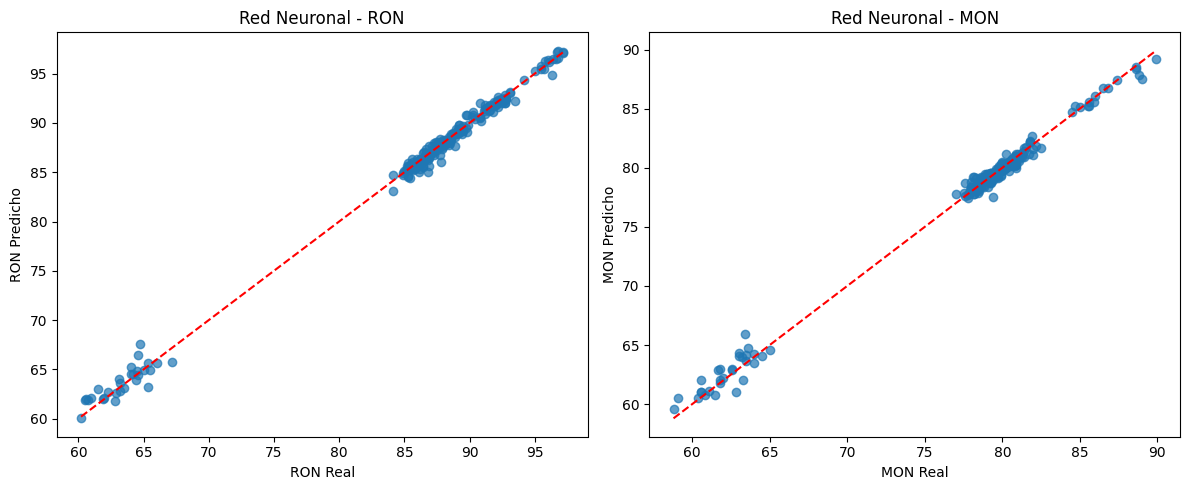

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# RON
axs[0].scatter(y_test["RON"], y_pred[:, 0], alpha=0.7)
axs[0].plot([y_test["RON"].min(), y_test["RON"].max()],
             [y_test["RON"].min(), y_test["RON"].max()], 'r--')
axs[0].set_xlabel("RON Real")
axs[0].set_ylabel("RON Predicho")
axs[0].set_title("Red Neuronal - RON")

# MON
axs[1].scatter(y_test["MON"], y_pred[:, 1], alpha=0.7)
axs[1].plot([y_test["MON"].min(), y_test["MON"].max()],
             [y_test["MON"].min(), y_test["MON"].max()], 'r--')
axs[1].set_xlabel("MON Real")
axs[1].set_ylabel("MON Predicho")
axs[1].set_title("Red Neuronal - MON")

plt.tight_layout()
plt.show()